In [1]:
import math
import matplotlib.pyplot as plt

# Método predictor-correcctor: Runge-Kutta 4 + Adams-Bashforth-Moulton 4 pasos
## Para resolver la ecuación $y'=f(t,y)$ sujeta a $y(t_0)=y_0$.

Un método *predictor-corrector* (o de *predicción corrección*) es la combinación de una técnica explícita con una implícita. Aquí aplicaremos el **método RK4**:<br/><br/>
    \begin{gather*}
        y_{n+1}=y_n +\frac{h}{6}(k_1+2k_2+2k_3+k_4) \\
        \text{donde:}\\
        k_1=f(x_n,y_n),\\
        k_2=f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_1),\\
        k_3=f(x_n+\frac{1}{2}h,y_n+\frac{1}{2}hk_2),\\
        k_4=f(x_n+h,y_n+hk_3);\\
    \end{gather*}<br/><br/>
para inicializar el problema y obtener $\{y_i\}_{i=0}^3$. Después, usaremos la fórmula explícita de Adams-Bashforth (*parte predictora*) de 4 pasos:<br/><br/>
    \begin{gather}
        y_{i+1}=y_i+\frac{h}{24}\left[ 55 f (t_i,y_i) -59 f (t_{i-1},y_{i-1})
            +37f(t_{i-2},y_{i-2}) -9f(t_{i-3},y_{i-3})\right]
    \end{gather}<br/><br/>
combinada con la fórmula implícita de Adams-Moulton (*parte correctora*) de 4 pasos:<br/><br/>
    \begin{gather}
        y_{i+1}=y_i+\frac{h}{720}\left[ 251 f(t_{i+1},y_{i+1})+646f(t_i,y_i)-
        264f(t_{i-1},y_{i-1})+106f(t_{i-2},y_{i-2})-19f(t_{i-3},y_{i-3})\right]
    \end{gather}<br/><br/>

## 1. Definir el método numérico

In [2]:
# Definir el método RK4 (inicialización)
#f0=función, (x0,y0)=condición inicial, xf=punto final, h0=tamaño de incremento
def rk4(f0,x0,y0,xf,h0):
    n0=int((xf-x0)/h0)
    X=[x0+i*h0 for i in range(n0+1)]
    Y=[y0]
    for x in X:
        k1=f0(x,Y[-1])
        k2=f0(x+h0/2,Y[-1]+h0*k1/2)
        k3=f0(x+h0/2,Y[-1]+h0*k2/2)
        k4=f0(x+h0,Y[-1]+h0*k3)
        Y.append(Y[-1]+(h0/6)*(k1+2*k2+2*k3+k4))
    return X,Y[:-1]

# Definir la predicción (xj=(ti,yi) son las duplas (t_{j-i},y_{j-i}))
def pred(f0,x0,x1,x2,x3,h0):
    return x0[1]+(h0/24)*(55*f0(x0[0],x0[1])-59*f0(x1[0],x1[1])
                          +37*f0(x2[0],x2[1])-9*f0(x3[0],x3[1]))

# Definir la corrección
def corr(f0,x0,x1,x2,x3,x4,h0):
    return x1[1]+(h0/720)*(251*f0(x0[0],x0[1])
                           +646*f0(x1[0],x1[1])-264*f0(x2[0],x2[1])
                           +106*f0(x3[0],x3[1])-19*f0(x4[0],x4[1]))

In [3]:
#Combinar las rutinas
def pred_corr(f0,t0,y0,tf,h0):
    n0=int((tf-t0)/h0)
    T=[t0+i*h0 for i in range(n0+1)]
    Y=rk4(f0,t0,y0,t0+3*h0,h0)[1]
    for i in range(3,n0):
        y=pred(f0,(T[i],Y[-1]),(T[i-1],Y[-2]),(T[i-2],Y[-3]),
               (T[i-3],Y[-4]),h0)
        y=corr(f0,(T[i+1],y),(T[i],Y[-1]),(T[i-1],Y[-2]),
               (T[i-2],Y[-3]),(T[i-3],Y[-4]),h0)
        Y.append(y)
    return T,Y

## 2. Definir la ecuación diferencial con las condiciones iniciales, intervalo de integración y tamaño de paso
$y'(t)=ty^3\sin(-ty),\;y'(1)=-2,\;t\in[1,10]$

In [7]:
f=lambda t,y:t*y**3*math.sin(-y*t)
g=lambda t,y:t*y**3*math.cos(-y*t)
t_inicial,y_inicial,t_final=1,-2,10
h=0.01

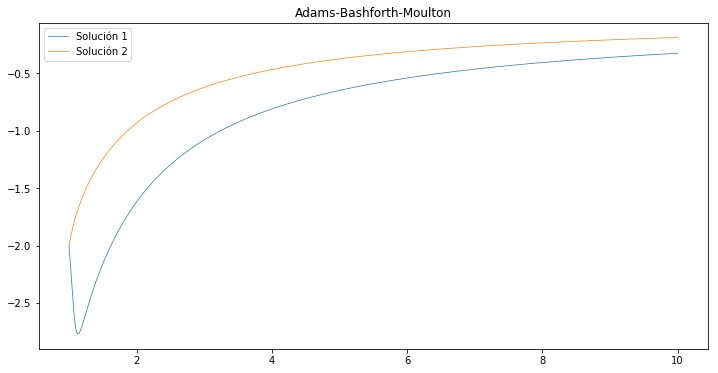

In [9]:
#Sacar la solución y graficar
PC1=pred_corr(f,t_inicial,y_inicial,t_final,h)
PC2=pred_corr(g,t_inicial,y_inicial,t_final,h)

plt.figure(figsize=(12,6))
plt.plot(PC1[0],PC1[1],lw=0.7,label='Solución 1')
plt.plot(PC2[0],PC2[1],lw=0.7,label='Solución 2')

plt.title('Adams-Bashforth-Moulton')
plt.legend()
#plt.savefig('grafica.pdf',format='pdf')